In [1]:
% matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import random as r
import operator as o

r.seed(0)

In [4]:
def diff(first, second):
    second = set(second)
    return [item for item in first if item not in second]

def dg(g):
    return list(g[ g['status'] =='digraph'  ].index)
    
def add_v(g, w, pos_nhbr, threshold):
    digraph = dg(g)
    v = len(g)
    g.loc[v] = [v, 'digraph', v, w, w, [v], [v] ]
    
    #niche condition: everyone is gp, then continue onto next vertex
    if not digraph:
        return 
    
    num_nhbr = r.choice(pos_nhbr)
    #done if no neighbors.
    if num_nhbr==0:
        return
    
    #collect neighbors in string
    nhbr = [v]
    
    for n in range(  num_nhbr  ):
        i = r.choice(digraph) 
        nhbr.append(i)
    not_v = nhbr[-1]

    g.set_value(v, 'nhbr', nhbr ) 
    g.set_value(v, 'root', g.loc[not_v]['root'] ) 
    
    # we go to every neighbor of v, take their component
    # make a big union of all components of neighbors of v
    # while adding weights from any new components w has connected
    new_comp = []
    for n in g.ix[nhbr, 'comp']: 
        if diff(n, new_comp):
            w += g.loc[n[0]]['sum_weight']
        new_comp += diff(n, new_comp)

    # if surpasses threshold, set current vertex to gp then quit
    if w > threshold:
        #g.loc[v] = [v, 'gp', v, w, w, nhbr, [v] ]
        g.set_value(v, 'comp', new_comp ) 
        g.set_value(v, 'status', 'gp' ) 
        return 
    
    # update components and component weights
    
    #if g.ix[new_comp[-1], 'sum_weight'] > w:
        #print('wtf?')
    
    g.ix[new_comp, 'sum_weight'] = w
    
    for x in new_comp:
        g.set_value(x, 'comp', new_comp)

In [13]:
#init global g
#g = pd.DataFrame(columns=['v', 'status', 'root',  'weight', 'sum_weight', 'nhbr', 'comp'] )
    
def reset(w):
    g = pd.DataFrame(columns=['v', 'status', 'root',  'weight', 'sum_weight', 'nhbr', 'comp'] )
    ini_weight = r.choice(w)
    g.loc[0] = [0, 'digraph', 0, ini_weight, ini_weight, [0] ,[0]]  
    return g
    
def run(num_ver = 1000, pos_nhbr = [0,1,2], threshold=20):
    
    weights = []
    for draw in range(num_ver):
        weights.append(np.random.exponential())
    
    g = reset(weights)

    c_value = []
    c_size = []
    gp_num = []

    for i in range(num_ver):
        add_v(g, weights[i], pos_nhbr, threshold)
        c_size.append(g['comp'].str.len().max())
        c_value.append(g['sum_weight'].max() )
        gp_num.append(  (g['status'] == 'gp').sum()  )
    
    return c_value, c_size, gp_num

#IN THIS EXAMPLE WE TREAT THRESHOLD AS PARAMETER
#idea: change # of pos_nhbr, or probability of having 1 nhbr, 2 nhbr, etc.
#idea: change vertex weight distribution to have an even more punishing dist.
threshold_list= [20, 40, 100, 200]

meta_val = []
meta_size = []
meta_gp = []

for t in threshold_list:
    val, size, gp_num = run(threshold = t)
    meta_val.append(val)
    meta_size.append(size)
    meta_gp.append(gp_num)
    print('done one!')

done one!
done one!
done one!
done one!


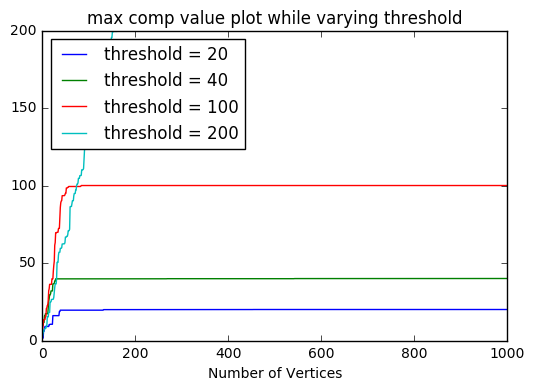

In [16]:
def plot(meta_list, list_name, varying_parameter, param_name):
    for l in range(len(meta_list)):
        plt.plot(range( len(meta_list[l]) ) , meta_list[l], label = '%s = %s' %(param_name, varying_parameter[l])   )
    plt.xlabel('Number of Vertices')
    plt.ylabel('')
    plt.title('%s plot while varying %s' %(list_name, param_name) )
    plt.legend(loc = 'upper left')
    plt.show()

plot(meta_val, 'max comp value', threshold_list, 'threshold')

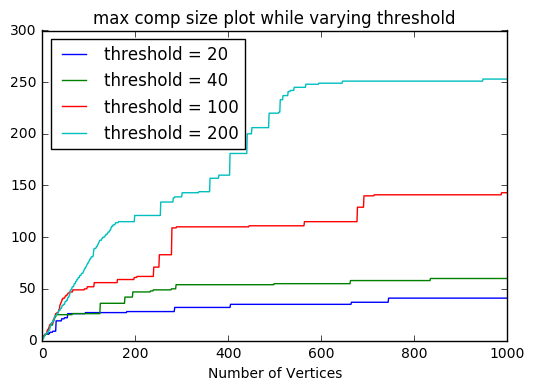

In [17]:
plot(meta_size, 'max comp size', threshold_list, 'threshold')

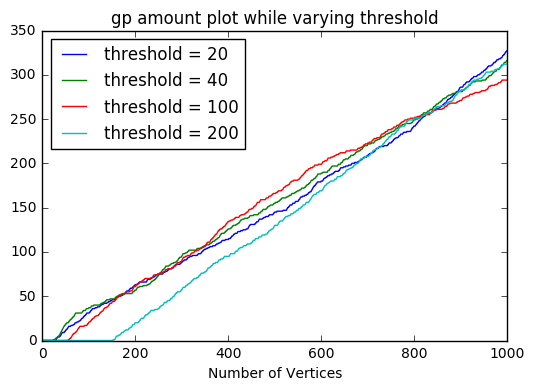

In [18]:
plot(meta_gp, 'gp amount', threshold_list, 'threshold')

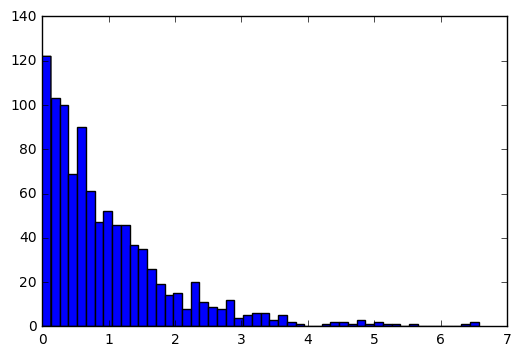

In [24]:
#be careful about running this cell
#once you run it, these variables are committed to global memory, whereas before all dataframes are kept in function scope
#this is to show you the expo. dist., which is how the vertex weights are dished out. 
num_ver = 1000 
weights = []
for draw in range(num_ver):
        weights.append(np.random.exponential())
    
plt.hist(weights, 50)
plt.show()